In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [49]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer)

In [74]:
num_bo_iters = 50
num_layers = 5

In [80]:
#experiment_dir = "../experiments/roi/elastic_resnet50_bo_50"
experiment_dir = "../experiments/wb/elastic_resnet50_bo_15"
meta_log, hyper_log = load_result_logs(experiment_dir)

In [84]:
hyper_log.best_bo_score.mean()

0.1319096028804779

# Bayesian Optimization Procedure Across Network Feature Layers

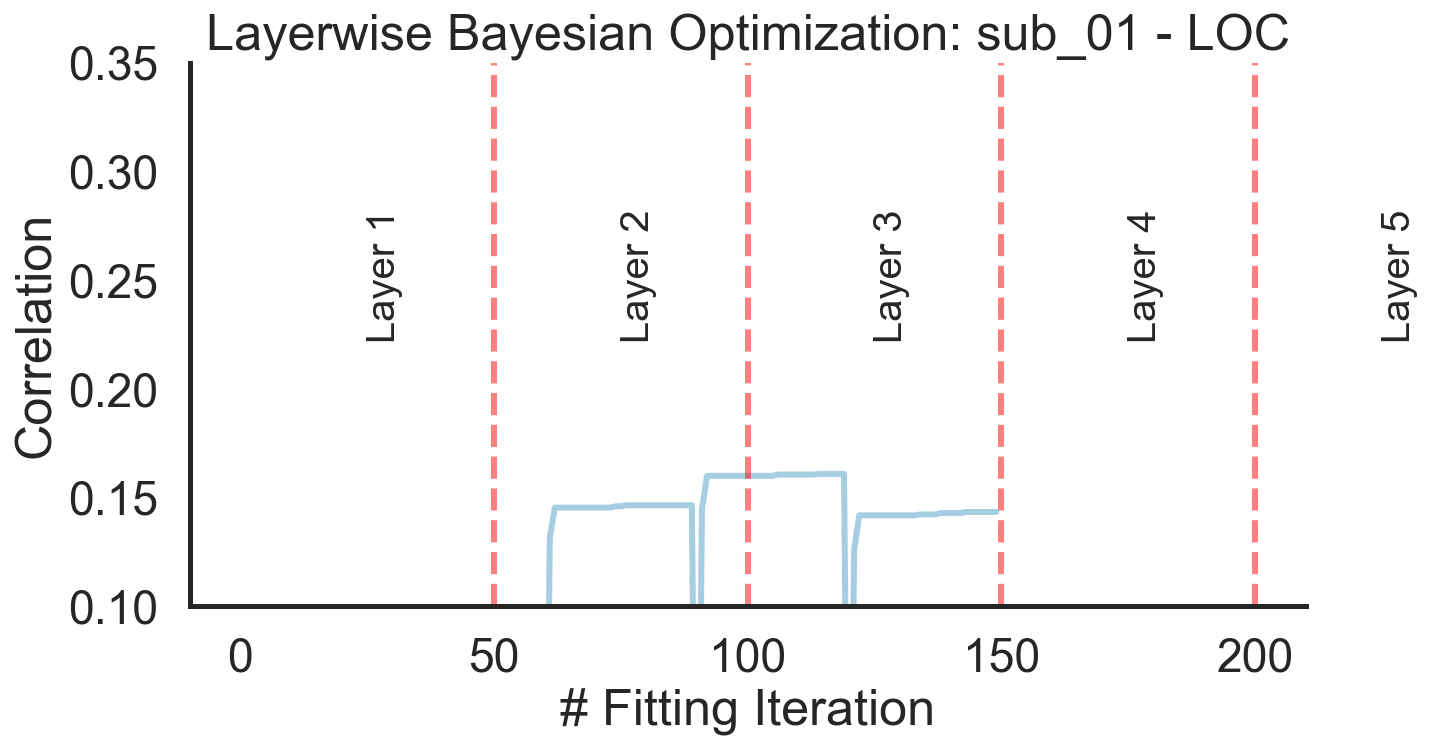

In [81]:
plot_bo_scores(meta_log, "b_1_eval_0", subject_id="sub_01", roi_type="LOC", num_bo_per_layer=num_bo_iters, num_layers=num_layers)

# Performance Across Subjects and ROIs

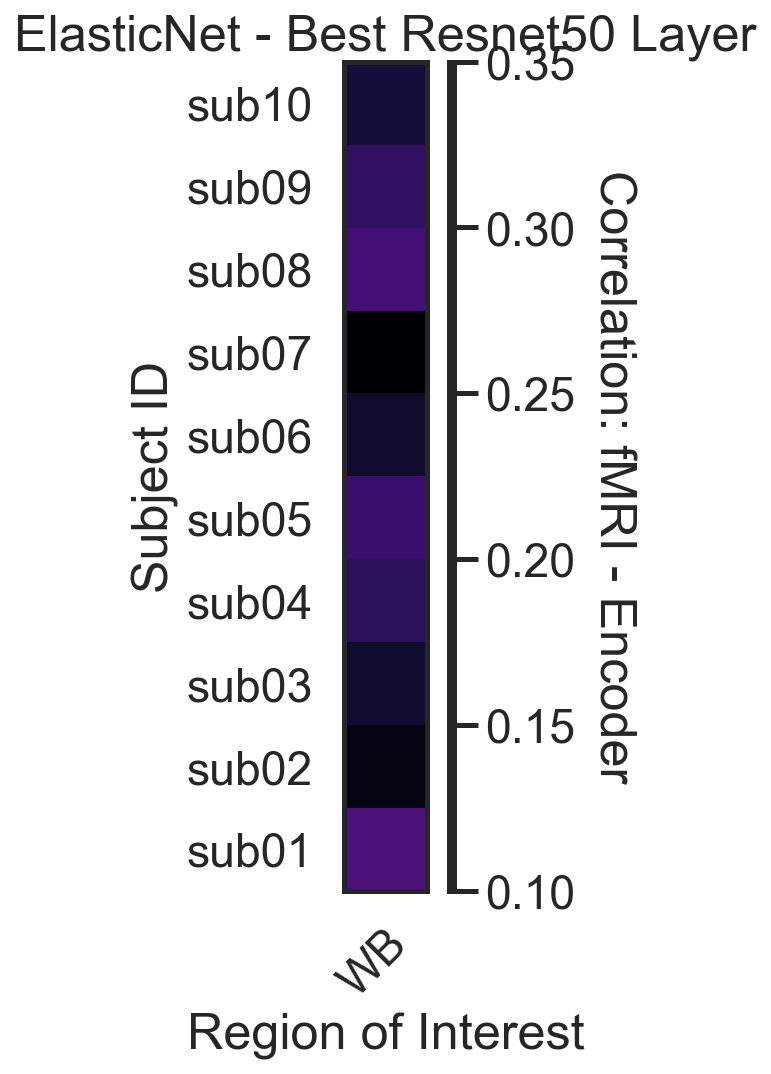

In [82]:
plot_roi_subject_grid(hyper_log, title="ElasticNet - Best Resnet50 Layer")

# Meaned Scores - Subject and ROI

../utils/visualize_experiments.py:32: RuntimeWarning: Mean of empty slice.
  region_roi_mean = heat_array[:, :-1].mean(axis=1)
/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


IndexError: index 0 is out of bounds for axis 0 with size 0

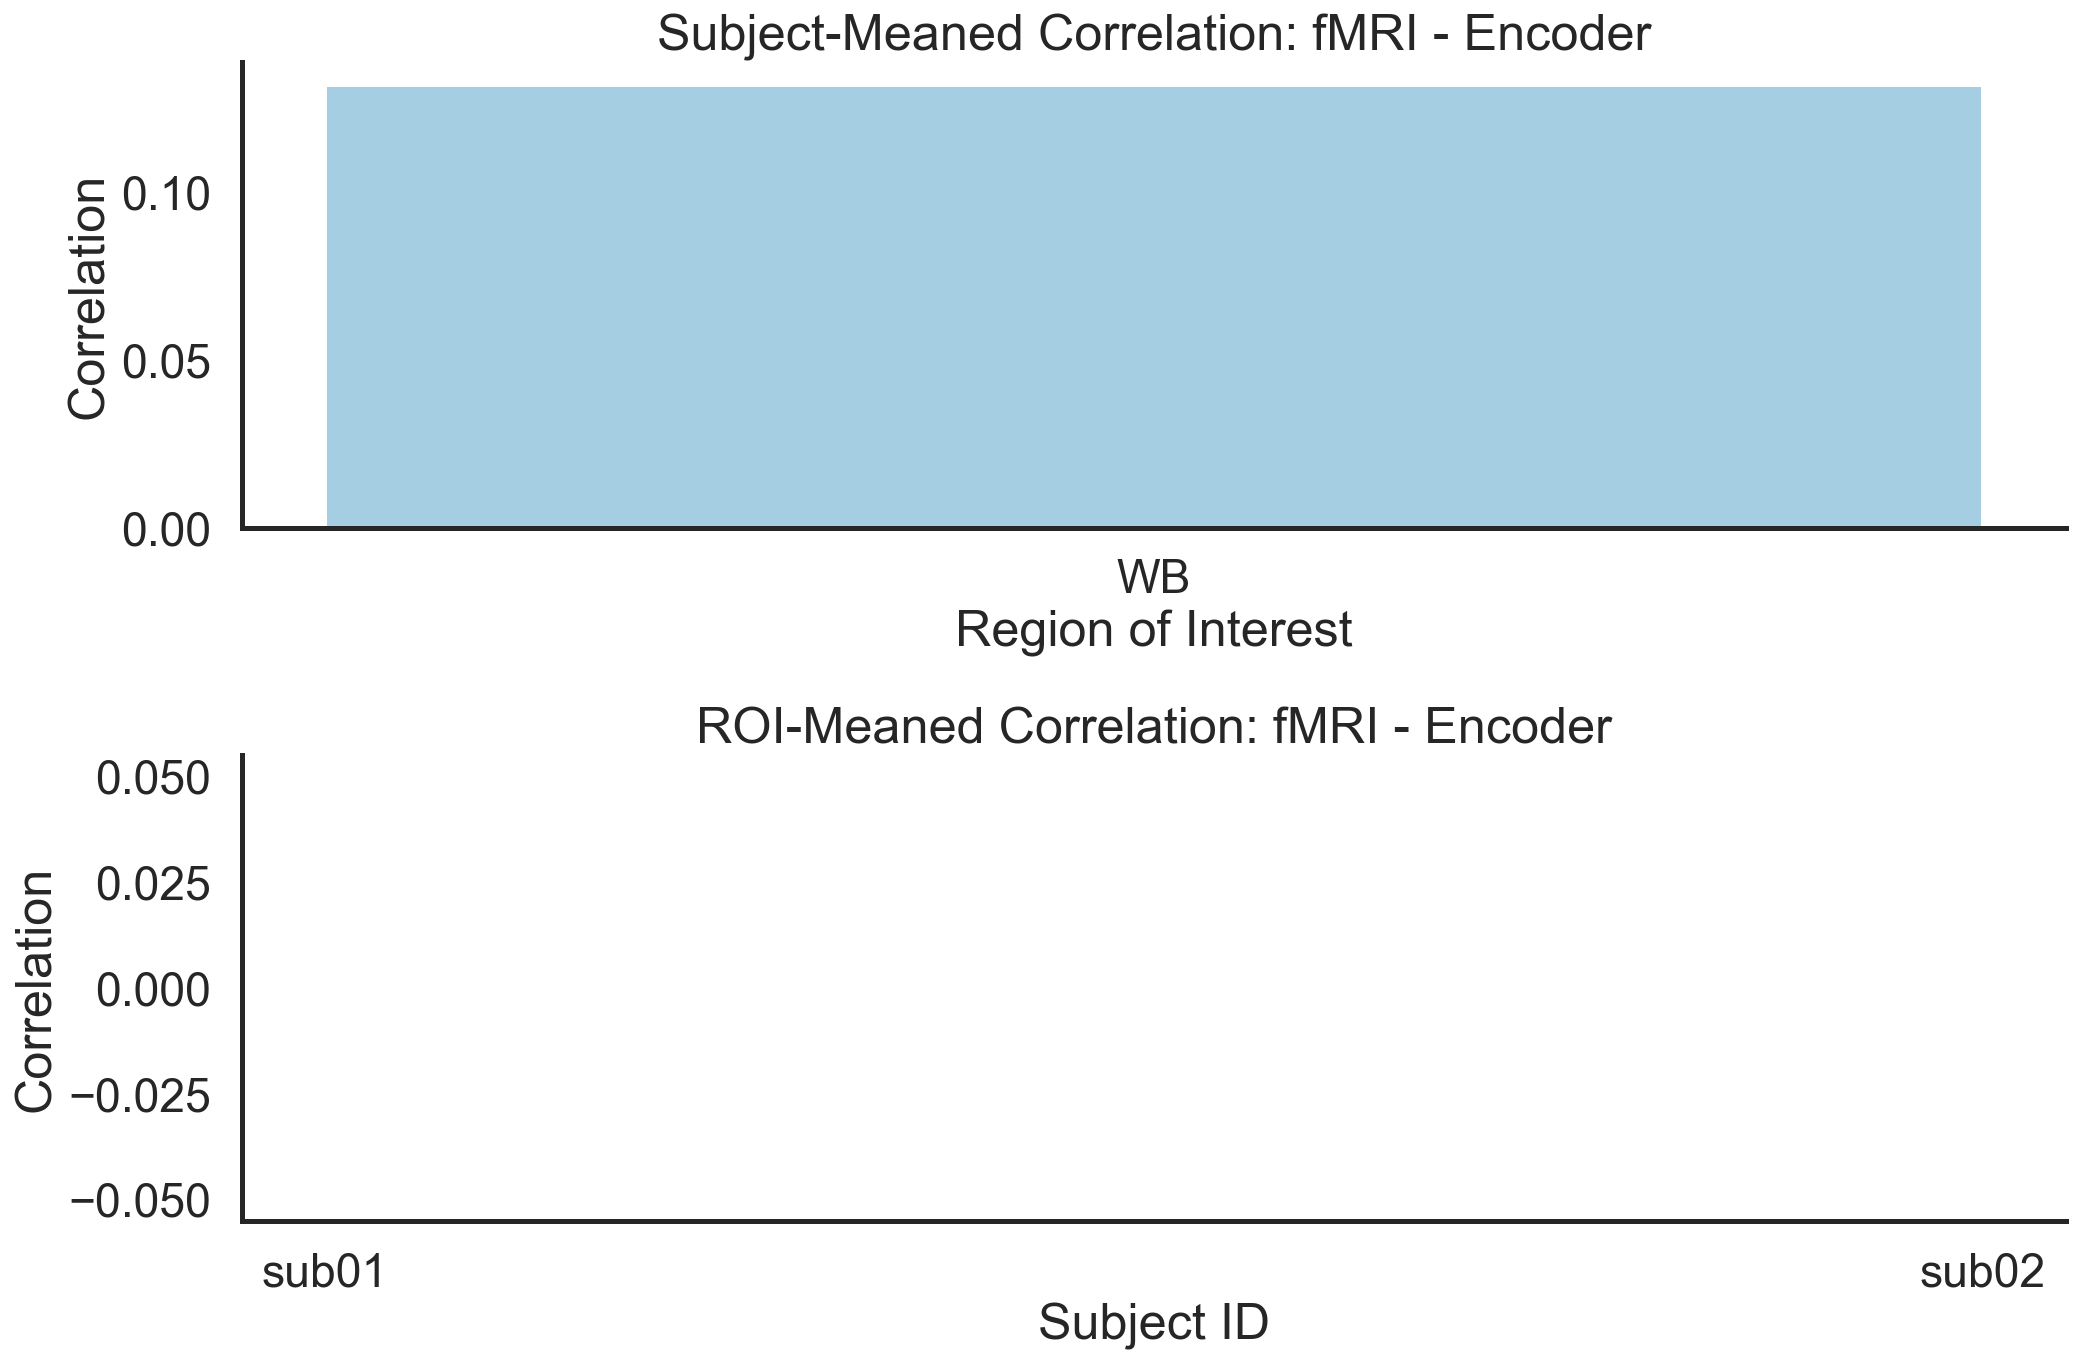

In [83]:
scores = plot_average_scores(hyper_log)
print(scores)

# Performance Per Layer

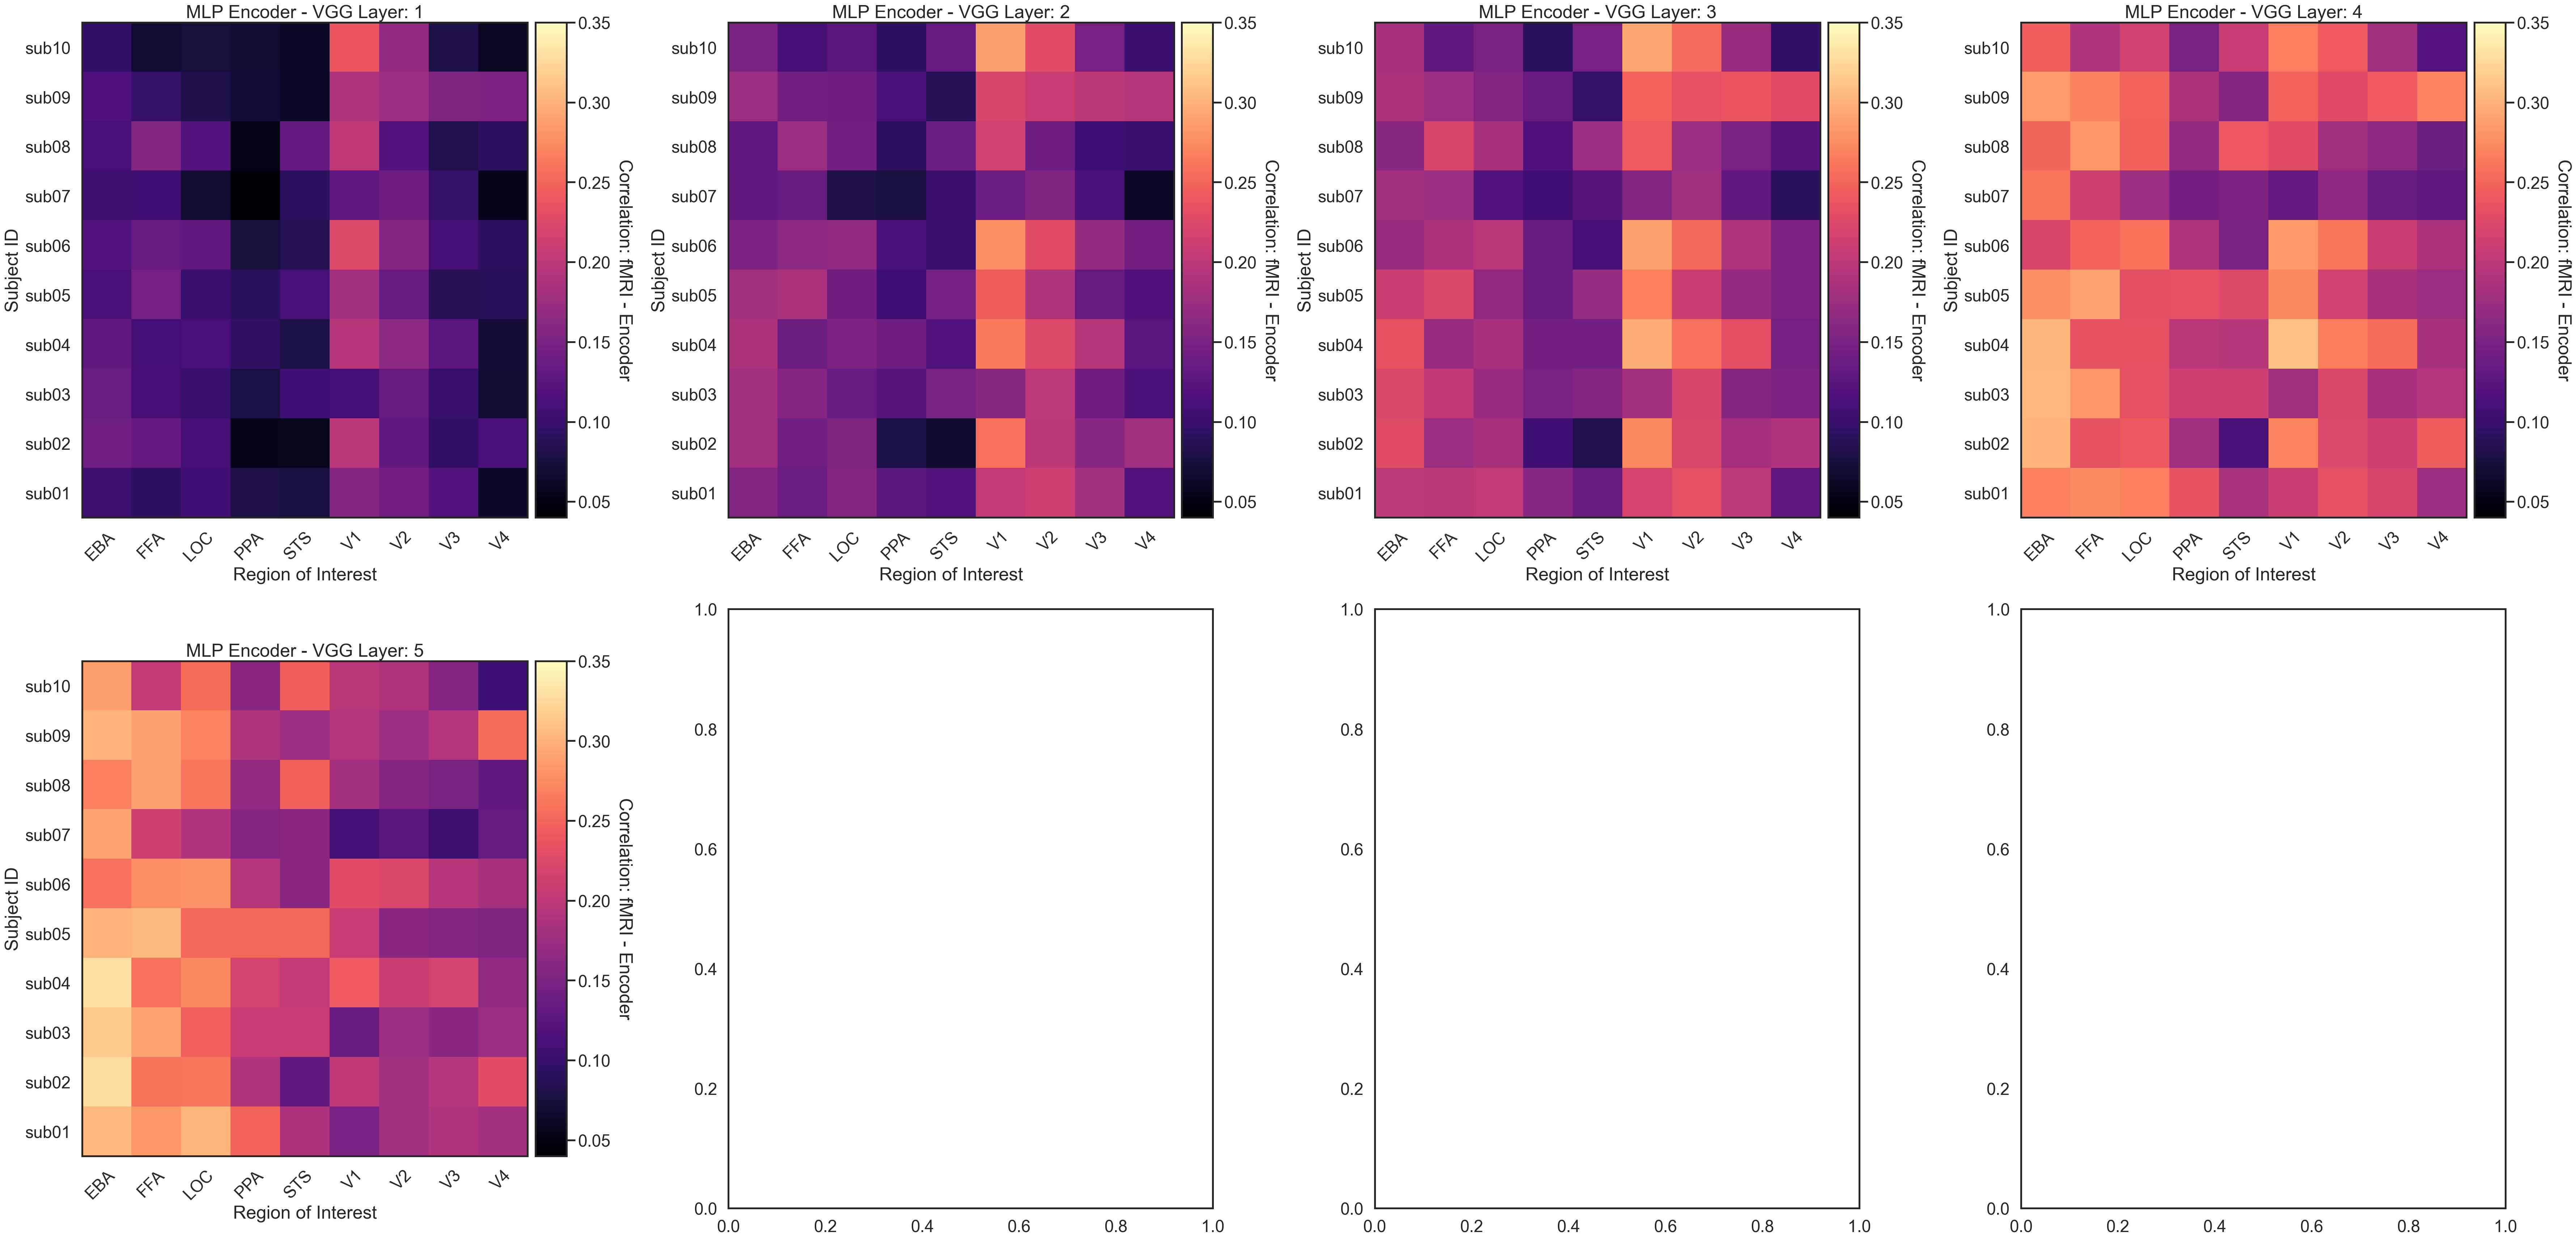

In [65]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=50, num_layers=5)

# Best Layer Per ROI/Subject

../utils/visualize_experiments.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_layer_df['best_layer_id'] = [int(l[-1]) for l in max_layer_df.layer_id]


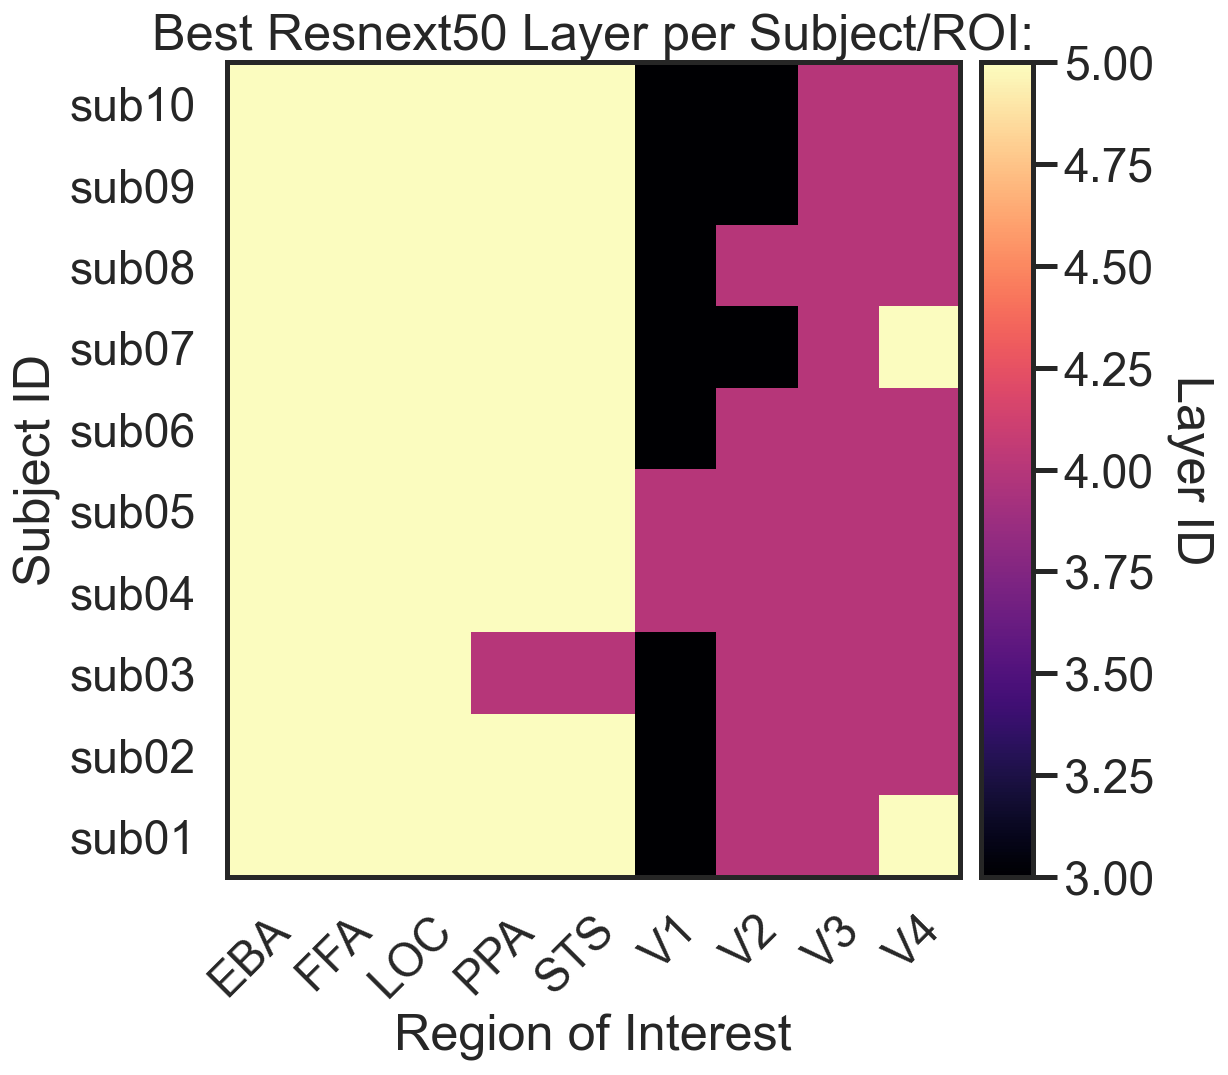

In [68]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")